# Welcome to BeRT's UDACITY WeRateDogs Project


### Table of Contents:
- <a href='#Gathering-the-Data'>Gathering the Data</a>
    - <a href='#Twitter-Archive'>Twitter Archive</a>
    - <a href='#Tweet-Image-Predictions'>Tweet Image Predictions</a>
    - <a href='#Tweet-JSON-Data'>Tweet JSON Data </a>
- <a href='#Assessing-the-Data'>Assessing the Data</a>
    - <a href='#Quality-Issues'>Quality Issues</a>
    - <a href='#Tidiness-Issues'>Tidiness Issues</a>
- <a href='#Cleaning-the-Data'>Cleaning the Data</a>
- <a href='#Storing-the-Data'>Storing the Data</a>
- <a href='#Analyzing-and-Visualizing-the-Data'>Analyzing and Visualizing the Data</a>

### Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sbs
import re
import statsmodels.api as sm
%matplotlib inline
import API_KEYS
pd.options.mode.chained_assignment = None

## Gathering the Data

#### Twitter Archive

In [2]:
udacity_df = pd.read_csv('twitter-archive-enhanced.csv')

#### Tweet Image Predictions

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as tsv:
    tsv.write(r.content)
prediction_df = pd.read_csv('image-predictions.tsv', sep='\t')

#### Tweet JSON Data

In [4]:
auth = tweepy.OAuthHandler(API_KEYS.consumer_key, API_KEYS.consumer_secret)
auth.set_access_token(API_KEYS.access_token, API_KEYS.access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True

In [5]:
for tweet_id in udacity_df.tweet_id.values:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        with open('tweet_json.txt', 'a') as txt:
            txt.write(json.dumps(tweet) + '\n')
    except tweepy.TweepError:
        continue

Rate limit reached. Sleeping for: 724
Rate limit reached. Sleeping for: 727


In [6]:
df = pd.read_json('tweet_json.txt', lines=True)

## Assessing the Data

In [7]:
udacity_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
udacity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
udacity_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
udacity_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Huck          1
Ambrose       1
Rueben        1
Rodney        1
Winifred      1
Name: name, Length: 957, dtype: int64

In [11]:
prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
prediction_df.tweet_id.duplicated().any()

False

In [13]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [16]:
df[df.retweeted_status.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2016-06-25 01:52:36+00:00,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN
1020,2016-06-17 16:01:16+00:00,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN
1219,2016-03-21 19:31:59+00:00,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN
2235,2015-11-20 03:51:52+00:00,667550904950915073,667550904950915072,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 32 columns):
created_at                       2332 non-null datetime64[ns, UTC]
id                               2332 non-null int64
id_str                           2332 non-null int64
full_text                        2332 non-null object
truncated                        2332 non-null bool
display_text_range               2332 non-null object
entities                         2332 non-null object
extended_entities                2061 non-null object
source                           2332 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
in_reply_to_screen_name          77 non-null object
user                             2332 non-null object
geo                              0 non-null float64
coordinates                 

In [18]:
df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.332000e+03,2.332000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2332.000000,2332.000000,2198.0,2198.0,2.600000e+01,2.600000e+01
mean,7.419201e+17,7.419201e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2787.877787,7733.941252,0.0,0.0,8.113972e+17,8.113972e+17
std,6.821966e+16,6.821966e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4717.365603,12001.771043,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782728e+17,6.782728e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,560.750000,1346.750000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1304.500000,3369.500000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986673e+17,7.986673e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3242.250000,9488.000000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,80081.000000,160160.000000,0.0,0.0,8.860534e+17,8.860534e+17


#### Quality Issues

1. There are incorrect/invalid Dog Names.
2. There are missing Dog Stages.
3. There are incorrect Rating Numerators.
4. There are incorrect Rating Denominators.
5. There are retweets present in the dataset.
6. Upon fixing Ratings, types become object.
7. tweet_id and id hold the same information. 
8. The tweet_id column is numeric. 

#### Tidiness Issues

1. Data split across multiple DataFrames
2. Dog Stages Variables are Column Names

## Cleaning the Data

In [19]:
udacity_df_clean = udacity_df.copy()
prediction_df_clean = prediction_df.copy()
df_clean = df.copy()

#### Define
Quality Issue 1: Apply a regex function to better extract Dog Names from tweets obtained via the API and add them as a new column.

#### Code

In [20]:
def name_search(x):
    match = re.search("(Say hello to |This is |Meet |This is.*named |Here is )([A-Z]\w+)", x)
    if match:
        return match.group(2)
    else:
        return None

df_clean['dog_name'] = df_clean.full_text.apply(name_search)

#### Test

In [21]:
# Should be only valid dog names.
df_clean.dog_name.value_counts()

Cooper      11
Charlie     11
Oliver      11
Lucy        10
Penny       10
            ..
Huck         1
Ambrose      1
Rueben       1
Rodney       1
Winifred     1
Name: dog_name, Length: 945, dtype: int64

In [22]:
for name, value in zip(df_clean.dog_name.value_counts().index, df_clean.dog_name.value_counts()):
    print(name, value)

Cooper 11
Charlie 11
Oliver 11
Lucy 10
Penny 10
Lola 10
Tucker 10
Bo 9
Winston 9
Sadie 8
Bailey 7
Toby 7
Buddy 7
Daisy 7
Milo 6
Oscar 6
Dave 6
Rusty 6
Scout 6
Jack 6
Stanley 6
Jax 6
Koda 6
Leo 6
Bella 6
Louis 5
Oakley 5
Finn 5
Bentley 5
Sunny 5
Alfie 5
George 5
Gus 5
Larry 5
Chester 5
Carl 4
Jerry 4
Riley 4
Shadow 4
Bruce 4
Cassie 4
Moose 4
Clark 4
Gary 4
Reginald 4
Sophie 4
Maggie 4
Loki 4
Clarence 4
Phil 4
Boomer 4
Brody 4
Dexter 4
Scooter 4
Maximus 4
Archie 4
Bear 4
Gerald 4
Ruby 4
Hank 4
Winnie 4
Sampson 4
Duke 4
Chip 4
Maddie 4
Beau 4
Jeffrey 4
Derek 4
Louie 3
Klevin 3
Sebastian 3
Malcolm 3
Otis 3
Lorenzo 3
Steven 3
Ted 3
Reese 3
Nala 3
Walter 3
Ellie 3
Frankie 3
Lily 3
Samson 3
Rufus 3
Paisley 3
Zoey 3
Peaches 3
Rosie 3
Colby 3
Wallace 3
Wyatt 3
Doug 3
Calvin 3
Kyle 3
Wilson 3
Sammy 3
Mia 3
Jimothy 3
Olive 3
Vincent 3
Earl 3
Max 3
Gizmo 3
Waffles 3
Rory 3
Coco 3
Zeke 3
Reggie 3
Arnie 3
Belle 2
Sierra 2
Herald 2
Rocco 2
Frank 2
Jessiga 2
Herschel 2
Mattie 2
Fiona 2
Phineas 2
Flávi

#### Define
Quality Issue 2 and Tidiness Issue 2: The dog stage variables are separate columns, and some are incorrect, to fix these I'll re-extract the dog stages by applying a regex function to the tweets obtained via the API and add them as a new column.

#### Code

In [23]:
def dogtype(x):
    types = []
    if 'doggo' in x.lower():
        types.append('doggo')
    if 'floofer' in x.lower():
        types.append('floofer')
    if 'pupper' in x.lower():
        types.append('pupper')
    if 'puppo' in x.lower():
        types.append('puppo')
    if types:
        return ', '.join(types)
    else:
        return None
    

df_clean['dog_stage'] = df_clean.full_text.apply(dogtype)

#### Test

In [24]:
# Should have Dog Stages
df_clean.dog_stage.value_counts()

pupper            270
doggo              89
puppo              35
doggo, pupper      12
floofer             9
doggo, puppo        2
doggo, floofer      1
Name: dog_stage, dtype: int64

In [25]:
# Shows up as new column
df_clean.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,dog_name,dog_stage
238,2017-03-24 22:08:59+00:00,845397057150107648,845397057150107648,Say hello to Mimosa. She's an emotional suppor...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 845397049587699714, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,Mimosa,doggo


#### Define
Quality Issues 3 & 4: Apply a regex function to better extract the Numerator and the Denominator from tweets obtained via the API and add these each as a new column.

#### Code

In [26]:
df_clean['rating_numerator'] = df_clean.full_text.apply(lambda x: re.search("(\d{1,4}\.?\d{0,2})\/(\d{1,3})(?!.*(\d{1,4})\/(\d{1,3}))", x).group(1))
df_clean['rating_denominator'] = df_clean.full_text.apply(lambda x: re.search("(\d{1,3}\.?\d{0,2})\/(\d{1,3})(?!.*(\d{1,3})\/(\d{1,3}))", x).group(2))

#### Test

In [27]:
# Rating Numerator and Denominator columns have been correctly added.
df_clean.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,dog_name,dog_stage,rating_numerator,rating_denominator
1142,2016-04-21 02:25:47+00:00,722974582966214656,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,False,"[0, 40]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 722974578855804928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,None,None,13,10


#### Define

Quality Issue 5: Remove the rows that are Retweets by making the DataFrame only those rows where no retweet information is available. 

#### Code

In [28]:
df_clean = df_clean[df_clean.retweeted_status.isnull()]

#### Test

In [29]:
# There should no longer be any retweeted tweets in the DataFrame
df_clean[df_clean.retweeted_status.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,dog_name,dog_stage,rating_numerator,rating_denominator


#### Define

Quality Issue 6: Make the Datatype numeric by using the Pandas function to_numeric on the rating_numerator and rating_denominator columns.

In [30]:
df_clean.rating_denominator.dtype, df_clean.rating_numerator.dtype # We can see that tye datatype is incorrectly object.

(dtype('O'), dtype('O'))

#### Code

In [31]:
df_clean.rating_numerator = pd.to_numeric(df_clean.rating_numerator)
df_clean.rating_denominator = pd.to_numeric(df_clean.rating_denominator)

#### Test

In [32]:
# DataType is now correctly numeric.
df_clean.rating_denominator.dtype, df_clean.rating_numerator.dtype

(dtype('int64'), dtype('float64'))

#### Define

Tidiness Issue 1: Join/Merge the Prediction DataFrame and Tweets DataFrame to create a single unified DataFrame.  

#### Code

In [33]:
master_df = pd.merge(df_clean, prediction_df_clean, left_on='id', right_on='tweet_id')

#### Test

In [34]:
# The DataFrames appear to have merged correctly. 
master_df 
# The other benefit of this join/merge, is the Tweets that don't have an image have also been removed. 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1983,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1984,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1985,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Define

Quality Issues 7: I'll remove the id column since that information is represented in the tweet_id column.

Not an issue: Make the master_df only those columns that I want to keep, and put those columns in a good order. 
Rename the columns by settings the DataFrame's columns attribute to the desired names.

Columns that I want to remove include: 

'id_str', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

In [35]:
master_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'dog_name', 'dog_stage', 'rating_numerator',
       'rating_denominator', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Code

In [36]:
master_df = master_df[['created_at', 'tweet_id', 'full_text', 'jpg_url', 'retweet_count', 'favorite_count', 'dog_name', 'dog_stage', 'rating_numerator',
 'rating_denominator', 'p1', 'p1_conf', 'p1_dog']]
master_df.columns =  ['timestamp', 'tweet_id', 'tweet_text', 'jpg_url', 'num_retweets', 'num_favorited', 'dog_name', 'dog_stage', 'rating_numerator',
 'rating_denominator', 'image_prediction', 'prediction_confidence', 'prediction_is_dog']

#### Test

In [37]:
# The id Column has been successfully dropped.
master_df.sample()

,timestamp,tweet_id,tweet_text,jpg_url,num_retweets,num_favorited,dog_name,dog_stage,rating_numerator,rating_denominator,image_prediction,prediction_confidence,prediction_is_dog
1292,2016-01-06 00:54:18+00:00,684538444857667585,"After watching this video, we've determined th...",https://pbs.twimg.com/ext_tw_video_thumb/68453...,976,2700,None,None,12.0,10,Chihuahua,0.702583,True


#### Define
Quality Issue 8: Use astype to make the currently numeric tweet_id column a str.  

#### Code

In [38]:
master_df.tweet_id = master_df.tweet_id.astype('str')

#### Test

In [39]:
# tweet_id is now the correct datatype.
master_df.tweet_id.dtype

dtype('O')

## Storing the Data

In [40]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing the Data

In [41]:
master_df['normalized_score'] = (master_df.rating_numerator / master_df.rating_denominator)*10

In [42]:
# There are three ratings that are 'valid' but don't fit well into the data, so for the purpose of analysis I'll remove them.
master_df = master_df[master_df.normalized_score < 34]

#### 1) Analysis of Calculated Scores.

In [43]:
rating_avg = master_df.normalized_score.mean()
rating_avg_certain_dog = master_df[master_df.prediction_is_dog == True].normalized_score.mean()
rating_avg_uncertain = master_df[master_df.prediction_is_dog == False].normalized_score.mean()
rating_avg, rating_avg_certain_dog, rating_avg_uncertain

(10.539707661290322, 10.902505105513956, 9.504854368932039)

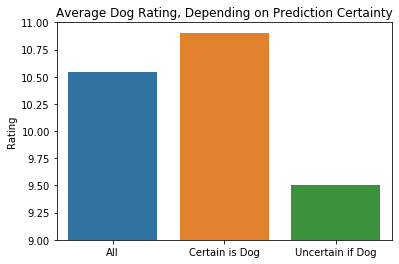

In [44]:
y_pos = np.arange(3)
sbs.barplot(y_pos, (rating_avg, rating_avg_certain_dog, rating_avg_uncertain))
plt.xticks(y_pos, ('All', 'Certain is Dog', 'Uncertain if Dog'))
plt.ylim(9,11)
plt.ylabel('Rating')
plt.title('Average Dog Rating, Depending on Prediction Certainty');

- For those ratings where our prediction is reasonably certain a dog is pictured, the average rating is about 10.9/10 
- If the first prediction of ours is not a dog, the average rating given is about 9.5/10

In [45]:
master_df.normalized_score.mode()[0], \
master_df.normalized_score.value_counts()[12], \
(str(master_df.normalized_score.value_counts(normalize=True)[12]*100)[0:5] + '%')

(12.0, 452, '22.78%')

- The most frequent rating was 12/10, which was found 452 times, or 22.78% of the ratings. 

#### 2) Analysis of Rating in Relation to Times Retweeted/ Favorited.

In [46]:
# The number of retweets and number of times favorited have strong multicollinearity, so we won't use them together. 
np.cov(master_df.num_retweets, master_df.num_favorited)

array([[2.04250467e+07, 5.23239016e+07],
       [5.23239016e+07, 1.55237784e+08]])

In [47]:
master_df['intercept'] = 1
mod = sm.OLS(master_df.num_favorited, master_df[['intercept', 'normalized_score']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_favorited   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     352.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.41e-72
Time:                        12:26:04   Log-Likelihood:                -21362.
No. Observations:                1984   AIC:                         4.273e+04
Df Residuals:                    1982   BIC:                         4.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -1.472e+04   1260.857    -11.677      0.000   -1.72e+04   -1.23e+04
normalized_score  2199.6783    117.102     18.784      0.000    1970.022    2429.335
==============================================================================
Omnibus:                     1973.389   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125106.952
Skew:                           4.714   Prob(JB):                         0.00
Kurtosis:                      40.743   Cond. No.                         53.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Predicted times favorited of a 10/10 rating, and average number of times favorited.
-1.473e+04 + 2200 * 10, master_df.num_favorited.mean()

(7270.0, 8461.178427419354)

According to the model, each 1 increase in rating out of 10 is correlated with an approximately 2200 increase in times favorited.

In [49]:
mod = sm.OLS(master_df.num_retweets, master_df[['intercept', 'normalized_score']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_retweets   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     187.2
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           8.74e-41
Time:                        12:26:04   Log-Likelihood:                -19423.
No. Observations:                1984   AIC:                         3.885e+04
Df Residuals:                    1982   BIC:                         3.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -3832.8137    474.492     -8.078      0.000   -4763.369   -2902.258
normalized_score   602.9354     44.068     13.682      0.000     516.510     689.361
==============================================================================
Omnibus:                     2695.551   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689559.566
Skew:                           7.564   Prob(JB):                         0.00
Kurtosis:                      93.070   Cond. No.                         53.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Predicted retweets of a 10/10 rating, and average number of retweets.
-3834.4720 + 603 * 10, master_df.num_retweets.mean() 

(2195.528, 2521.9490927419356)

According to the model, each 1 increase in rating out of 10 is correlated with an approximately 603 increase in times retweeted.

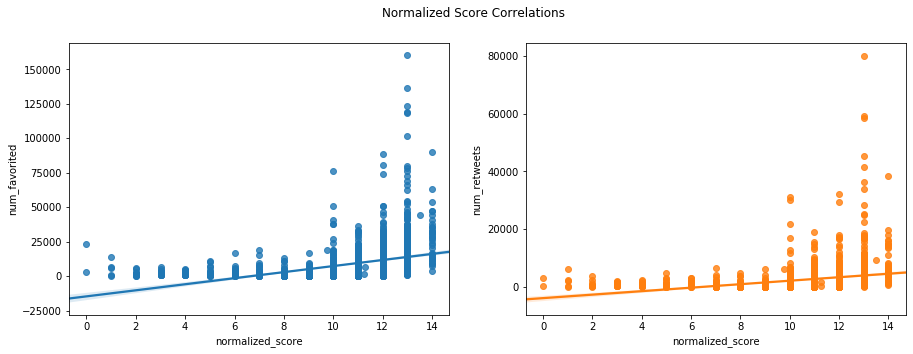

In [51]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
fig.suptitle('Normalized Score Correlations')
sbs.regplot(master_df.normalized_score, master_df.num_favorited, ax=axs[0])
sbs.regplot(master_df.normalized_score, master_df.num_retweets, ax=axs[1]);

#### 3) Analysis of Relationship between Retweets and Times Favorited.

In [52]:
master_df[['num_favorited', 'num_retweets']].corr()

,num_favorited,num_retweets
num_favorited,1.000000,0.929223
num_retweets,0.929223,1.000000


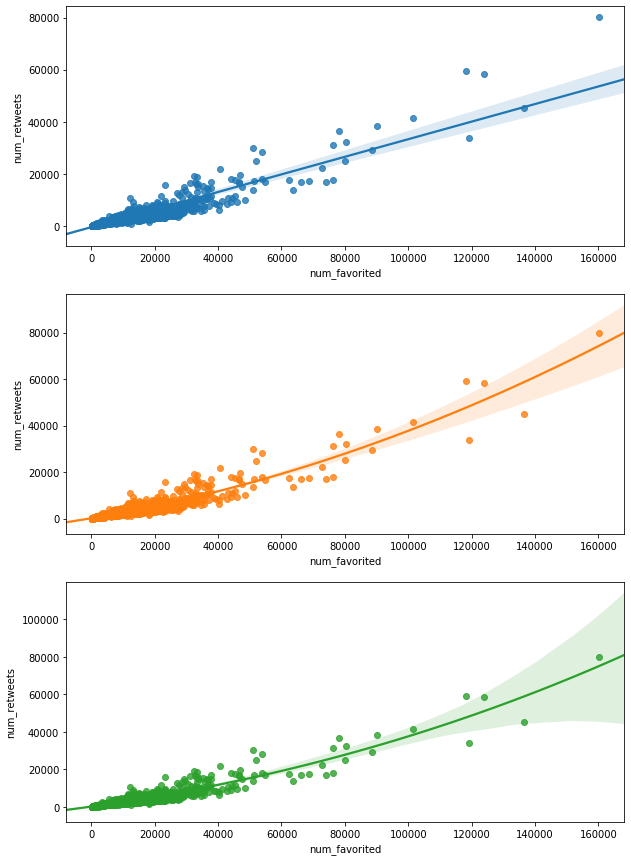

In [53]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10,15))
sbs.regplot(master_df.num_favorited, master_df.num_retweets, ax=axs[0])
sbs.regplot(master_df.num_favorited, master_df.num_retweets, order=2, ax=axs[1])
sbs.regplot(master_df.num_favorited, master_df.num_retweets, order=3, ax=axs[2]);

The number of retweets and number of times favorited are highly correlated. Although a linear relationship fits fairly well, these graphs suggest that a non-linear relationship may also be the case. 